### 제주도 해시태그 워드클라우드 분석

In [2]:
### 데이터 읽어들이기
# - 변수명 : raw_total
# - 데이터셋 파일 : 3_1_crawling_raw.xlsx
import pandas as pd

raw_total = pd.read_excel("./files/3_1_crawling_raw.xlsx")
raw_total.info()
raw_total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  8801 non-null   object
 1   date     8801 non-null   object
 2   like     8801 non-null   object
 3   place    2953 non-null   object
 4   tags     8801 non-null   object
dtypes: object(5)
memory usage: 343.9+ KB


,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [14]:
###데이터 중에 tags 컬럼의 데이터를 이용해서 워드클라우드 분석 진행
# 태그(tags) 데이터 확인하기
raw_total["tags"]

0       ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1       ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2       ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
3       ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...
4       ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...
                              ...                        
8796    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
8797    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
8798                           ['#사진좀찍으시는님덕에건져또', '#이순간']
8799                                                   []
8800                            ['#HappyNewYearEveryone']
Name: tags, Length: 8801, dtype: object

In [ ]:
### 모든 행의 해시태그 각각의 태그들을 하나의 리스트로 만들기
# - 하나의 리스트로 만들기
# - 변수명 : tags_total
#   (예시 : ['#제주핫플레이스', '#제주여행',.....'#HappyNewYearEveryone'])

# raw_total["tags"][0][2:-2].split("', '")[0]


# tags_total = [tag.strip(",") for tags in raw_total["tags"] for tag in tags[1:-1].replace("'", "").split()]
tags_total = [tag for tag in raw_total['tags'].str.slice(1, -1).str.replace("'", "").str.split(", ").explode()]

import ast

# # 장점: 가장 정확함 (리스트 형태 문자열을 진짜 리스트로 바꿔줌)
# # 단점: 성능상 약간 느릴 수 있음 (하지만 안전하고 명확함)
# raw_total["parsed_tags"] = raw_total["tags"].apply(ast.literal_eval)
# tags_total = raw_total["parsed_tags"].explode().tolist()


# # # 장점: 가볍고 빠름
# # # 단점: 문자열 파싱을 수작업으로 처리하므로 위험함 (구조 조금만 달라져도 오류 발생)
# tags_total = [tag.strip().strip("'") for tags in raw_total['tags'] for tag in tags[1:-1].split(",")]


tags_total


['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#제주',
 '#돔나이트',

### 단어 빈도 분석

In [103]:
### 각 단어의 중복된 갯수(빈도) 확인하기
# - 변수명 : tag_counts

### 워드카운드(단어 빈도 처리)
from collections import Counter

tag_counts = Counter(tags_total)
print(len(tag_counts))
tag_counts

19413


Counter({'#제주맛집': 3750,
         '#제주도맛집': 3467,
         '#제주여행': 3204,
         '#제주관광': 2898,
         '#제주도': 2096,
         '#제주': 1567,
         '#제주도여행': 1556,
         '#서귀포맛집': 1392,
         '#제주도가볼만한곳': 1047,
         '#서귀포': 872,
         '#제주핫플레이스': 848,
         '#jeju': 776,
         '#제주흑돼지맛집': 730,
         '#제주맛집추천': 728,
         '#일상': 717,
         '#제주도흑돼지': 713,
         '#제주카페': 711,
         '#제주도흑돼지맛집': 709,
         '#제주흑돼지': 693,
         '#협재맛집': 677,
         '#성산일출봉': 674,
         '#제주도민': 637,
         '#제주도그램': 609,
         '#서귀포흑돼지맛집': 605,
         '': 588,
         '#서귀포흑돼지': 582,
         '#제주가볼만한곳': 580,
         '#성산일출봉맛집': 567,
         '#섭지코지': 558,
         '#제주도민맛집': 542,
         '#제주핫플': 530,
         '#선팔': 522,
         '#섭지코지맛집': 519,
         '#제주살이': 516,
         '#여행스타그램': 498,
         '#통갈치구이': 495,
         '#제주통갈치구이': 485,
         '#제주서귀포맛집': 479,
         '#제주반영구': 478,
         '#중문맛집': 472,
         '#제주눈썹문신': 472,
         

### 불용어 처리하기

In [105]:
STOPWORDS = ["#제주도", "#제주", "#jeju", "#일상", "#jejudo"]
STOPWORDS


['#제주도', '#제주', '#jeju', '#일상', '#jejudo']

In [118]:
### tags_total 불용어 제거하기
# - 제거 후 변수명 : tag_total_selected
tag_total_selected = [d_tag for d_tag in tags_total if d_tag not in STOPWORDS]
tag_total_selected

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#돔나이트',
 '#스트레스',
 '#풀자',
 '#춤추며',
 '#땀날려',
 '#가끔

In [119]:
### 불용어 제거 이후 단어 빈도 확인
tag_total_selected = Counter(tag_total_selected)
print(len(tag_total_selected))
tag_total_selected

19408


Counter({'#제주맛집': 3750,
         '#제주도맛집': 3467,
         '#제주여행': 3204,
         '#제주관광': 2898,
         '#제주도여행': 1556,
         '#서귀포맛집': 1392,
         '#제주도가볼만한곳': 1047,
         '#서귀포': 872,
         '#제주핫플레이스': 848,
         '#제주흑돼지맛집': 730,
         '#제주맛집추천': 728,
         '#제주도흑돼지': 713,
         '#제주카페': 711,
         '#제주도흑돼지맛집': 709,
         '#제주흑돼지': 693,
         '#협재맛집': 677,
         '#성산일출봉': 674,
         '#제주도민': 637,
         '#제주도그램': 609,
         '#서귀포흑돼지맛집': 605,
         '': 588,
         '#서귀포흑돼지': 582,
         '#제주가볼만한곳': 580,
         '#성산일출봉맛집': 567,
         '#섭지코지': 558,
         '#제주도민맛집': 542,
         '#제주핫플': 530,
         '#선팔': 522,
         '#섭지코지맛집': 519,
         '#제주살이': 516,
         '#여행스타그램': 498,
         '#통갈치구이': 495,
         '#제주통갈치구이': 485,
         '#제주서귀포맛집': 479,
         '#제주반영구': 478,
         '#중문맛집': 472,
         '#제주눈썹문신': 472,
         '#제주도관광': 471,
         '#서귀포눈썹문신': 458,
         '#여행': 455,
         '#먹스타그램': 453,
   

In [120]:
### Counter 클래스 내에서 단어 빈도 상위 값 추출하는 함수
# - 단어빈도 상위 50개 추출 : 튜플 타입으로 단어와 빈도가 구분되어 출력됨
tag_total_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도여행', 1556),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433)]

### 단어 빈도 상위 30개에 대한 막대그래프(빈도 그래프) 시각화하기

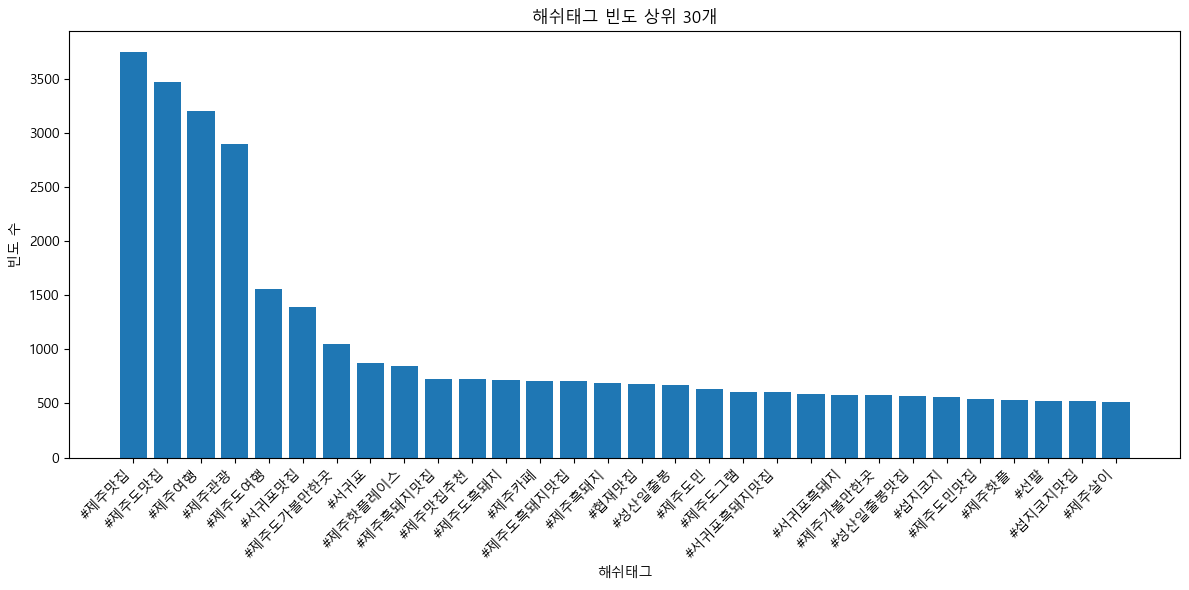

In [164]:
### 단어 빈도 상위 30개에 대한 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

### 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

# 상위 30개 단어 추출
tag_top_30 = tag_total_selected.most_common(30)

# 단어와 빈도수 분리
tags = [tag for tag, freq in tag_top_30]
frequencies = [freq for tag, freq in tag_top_30]

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(tags, frequencies)
plt.xticks(rotation=45, ha='right')
plt.xlabel("해쉬태그")
plt.ylabel("빈도 수")
plt.title("해쉬태그 빈도 상위 30개")
plt.tight_layout()
plt.show()

In [ ]:
### 단어 빈도 상위 30개에 대한 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

### 단어 빈도 상위 30개에 대한 데이터프레임으로 생성하여 처리
tag_counts_df = pd.DataFrame(tag_total_selected.most_common(30))

### 컬럼명 재정의
tag_counts_df.columns = ["tags", "freq"]

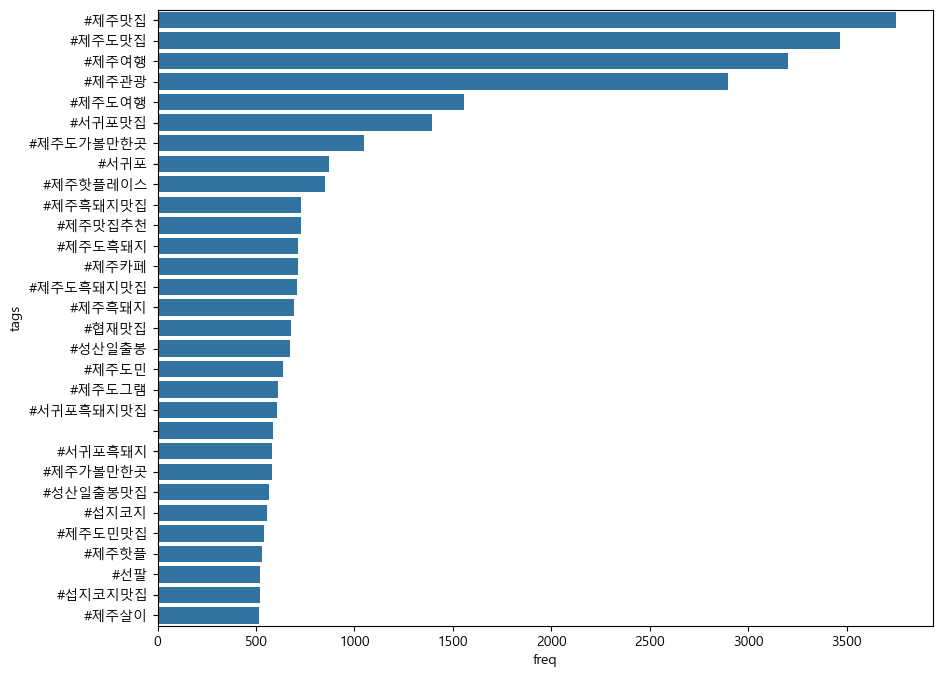

In [170]:
### 막대그래트 그리기
plt.figure(figsize=(10, 8))
sns.barplot(x="freq", y="tags", data=tag_counts_df)
plt.show()

### 워드클라우드 시각화하기

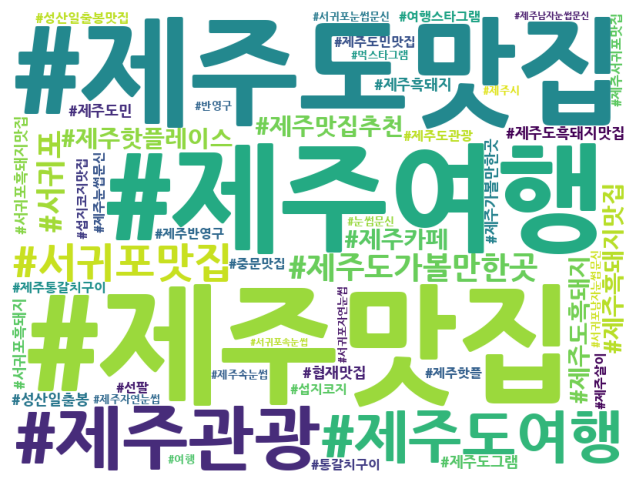

In [205]:
### 단어빈도 상위 50개에 대한 워드 클라우드 시각화
# - 워드클라우드 시각화 이미지 파일로 저장
#  -> 저장 파일명 : ./images/jeju_tag_wordcloud.png

### 워드클라우드 시각화
from wordcloud import WordCloud

### 한글 폰트 위치 설정
# - 윈도우
font_path='C:/Windows/Fonts/nanumgothicextrabold.ttf'

tag_top_50 = tag_total_selected.most_common(50)

tag_freq = {tag: freq for tag, freq in tag_top_50}

Wordcloud = WordCloud(
        font_path=font_path,
        background_color="white",
        max_words=50,
        relative_scaling=0.1,
        width=800,
        height=600
    ).generate_from_frequencies(tag_freq)

plt.figure(figsize=(8, 6))

plt.imshow(Wordcloud)

plt.axis("off")

plt.savefig("./images/jeju_tag_wordcloud.png")

plt.show()